# **Basic trend analysis using Linear Regression**

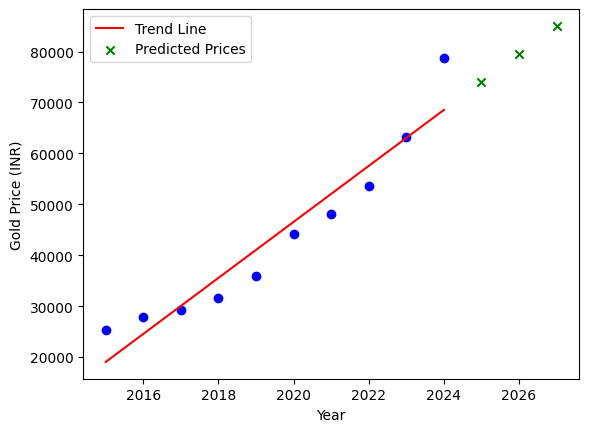

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data
years = np.array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]).reshape(-1, 1)
gold_prices = np.array([25380, 27850, 29320, 31540, 35960, 44120, 48150, 53600, 63200, 78760])

# Linear regression model
model = LinearRegression()
model.fit(years, gold_prices)

# Prediction
future_years = np.array([2025, 2026, 2027]).reshape(-1, 1)
predicted_prices = model.predict(future_years)

# Visualization
plt.scatter(years, gold_prices, color='blue')
plt.plot(years, model.predict(years), color='red', label='Trend Line')
plt.scatter(future_years, predicted_prices, color='green', marker='x', label='Predicted Prices')
plt.xlabel('Year')
plt.ylabel('Gold Price (INR)')
plt.legend()
plt.show()


# **Code to demonstrate how to use ARIMA for time series forecasting**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


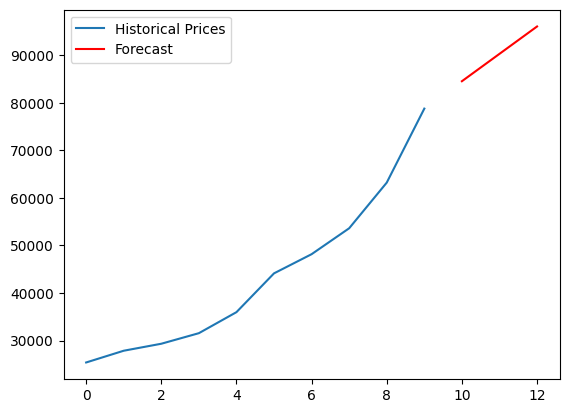

In [28]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Sample data - Gold prices for each year
gold_prices = [25380, 27850, 29320, 31540, 35960, 44120, 48150, 53600, 63200, 78760]

# Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(gold_prices, order=(1, 1, 1))
fitted_model = model.fit()

# Forecast the next 3 years
forecast = fitted_model.forecast(steps=3)

# Visualization
plt.plot(gold_prices, label='Historical Prices')
plt.plot(range(len(gold_prices), len(gold_prices) + 3), forecast, label='Forecast', color='red')
plt.legend()
plt.show()


# **Example of using Facebook Prophet for detecting seasonality**

In [29]:
!pip install prophet

<ipython-input-30-bec38e9bbdaf>:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  'ds': pd.date_range(start='2015-01-01', periods=10, freq='Y'),
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1m80bdaw/s8ubxfyu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1m80bdaw/qb0bhlvd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42564', 'data', 'file=/tmp/tmp1m80bdaw/s8ubxfyu.json', 'init=/tmp/tmp1m80bdaw/qb0bhlvd.json', 'output', 'file=/tmp/tmp1m80bdaw/prophet_modelmajg52_0/prophet_model-20241029012834.csv', 'method=optimiz

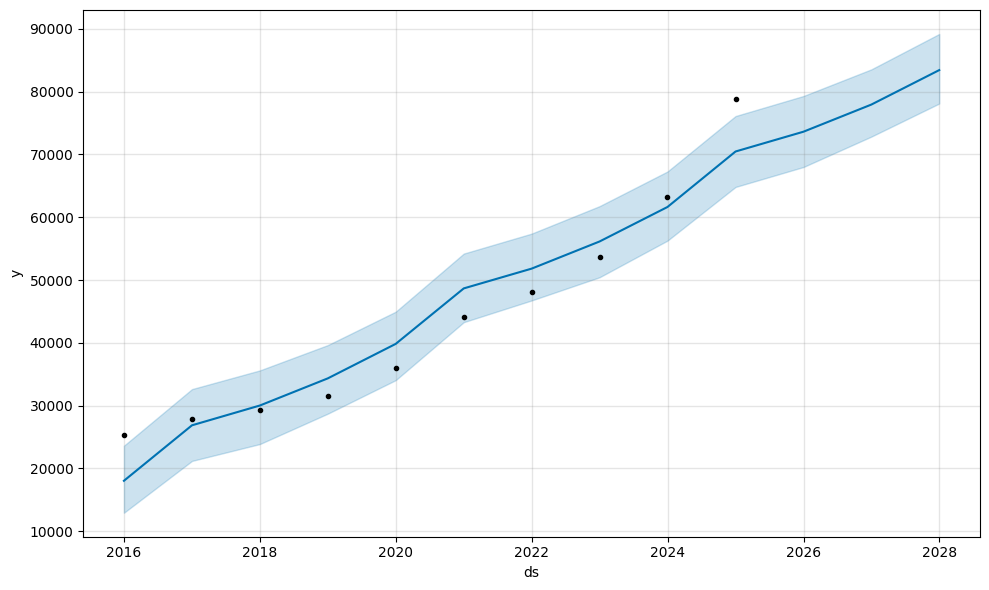

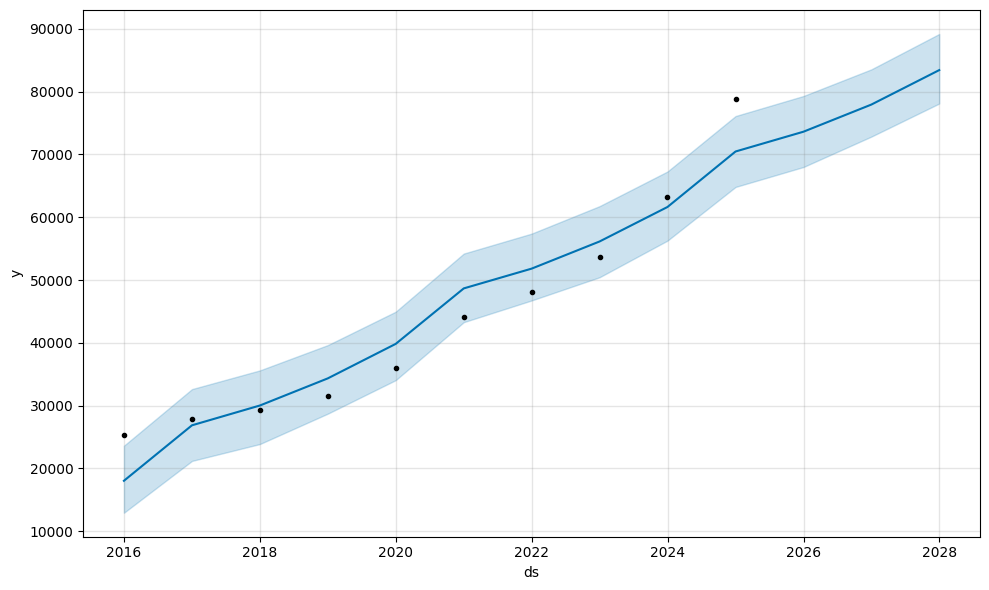

In [30]:
from prophet import Prophet # changed import to prophet.Prophet
import pandas as pd

# Create a DataFrame for Prophet
data = pd.DataFrame({
    'ds': pd.date_range(start='2015-01-01', periods=10, freq='Y'),
    'y': [25380, 27850, 29320, 31540, 35960, 44120, 48150, 53600, 63200, 78760]
})

# Initialize and fit Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(data)

# Forecast the next 3 years
future = model.make_future_dataframe(periods=3, freq='Y')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)

# **Monte Carlo simulation for predicting future gold prices**

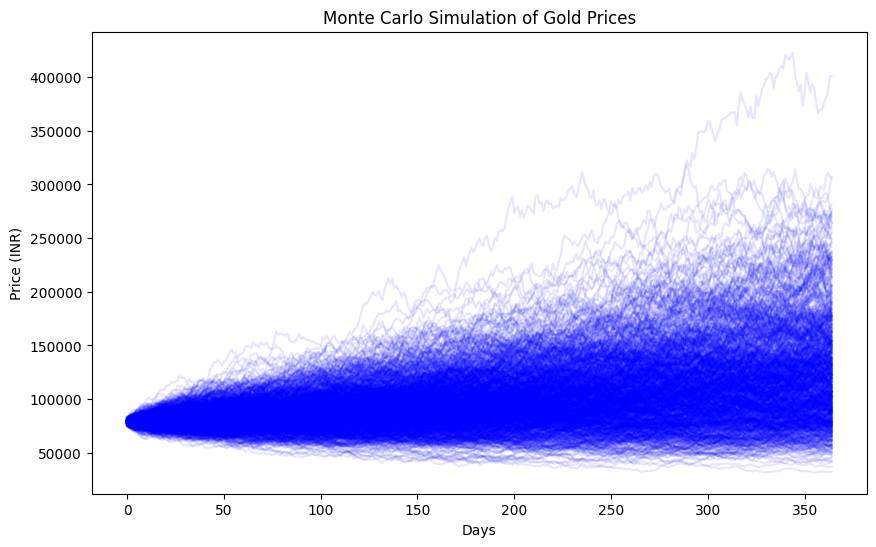

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for simulation
num_simulations = 1000
num_days = 365
initial_price = 78760
volatility = 0.02

# Monte Carlo simulation
simulations = np.zeros((num_simulations, num_days))
for i in range(num_simulations):
    daily_returns = np.random.normal(loc=0.001, scale=volatility, size=num_days)
    simulations[i] = initial_price * np.exp(np.cumsum(daily_returns))

# Plot simulations
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(simulations[i], color='blue', alpha=0.1)
plt.title('Monte Carlo Simulation of Gold Prices')
plt.xlabel('Days')
plt.ylabel('Price (INR)')
plt.show()


# **Code snippet to demonstrate a correlation matrix**

<Axes: >

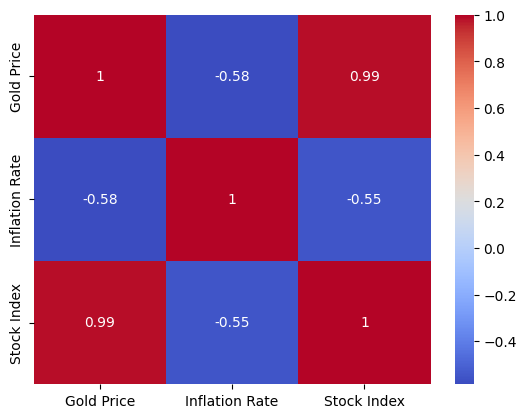

In [32]:
import seaborn as sns
import pandas as pd

# Sample dataset of macroeconomic variables
data = pd.DataFrame({
    'Gold Price': [25380, 27850, 29320, 31540, 35960, 44120, 48150, 53600, 63200, 78760],
    'Inflation Rate': [5.5, 4.8, 4.9, 5.1, 5.2, 4.7, 4.5, 4.6, 4.8, 4.7],
    'Stock Index': [27000, 28000, 30000, 32000, 35000, 36000, 37000, 40000, 45000, 49000]
})

# Plot correlation matrix
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')


# **Volatility & Risk Analysis: Using GARCH Models**

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 2.096e-06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 1000 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


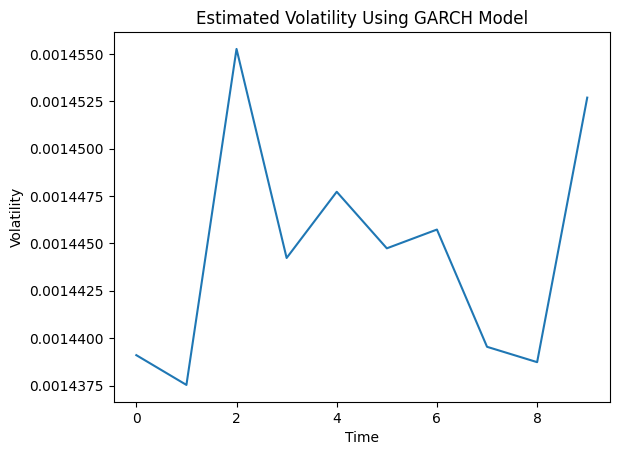

In [33]:
from arch import arch_model
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for GARCH model (daily percentage changes in gold price)
gold_returns = pd.Series([0.001, -0.002, 0.0003, 0.002, 0.0015, -0.001, 0.0005, 0.0012, -0.0018, 0.0023])

# Fit GARCH(1,1) model
garch_model = arch_model(gold_returns, vol='Garch', p=1, q=1)
garch_fit = garch_model.fit(disp='off')

# Plot the conditional volatility
plt.plot(garch_fit.conditional_volatility)
plt.title('Estimated Volatility Using GARCH Model')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.show()


# **Multivariate Regression Analysis**

In [34]:
import statsmodels.api as sm
import pandas as pd

# Sample dataset with dependent and independent variables
data = pd.DataFrame({
    'Gold Price': [25380, 27850, 29320, 31540, 35960, 44120, 48150, 53600, 63200, 78760],
    'Interest Rate': [7.5, 7.3, 7.2, 7.1, 6.9, 6.8, 6.7, 6.6, 6.5, 6.4],
    'Trade Policy Index': [50, 52, 55, 58, 60, 62, 65, 68, 70, 73],
    'Global Gold Reserves': [30, 32, 34, 36, 38, 40, 43, 45, 47, 50]
})

# Defining dependent (target) and independent variables
X = data[['Interest Rate', 'Trade Policy Index', 'Global Gold Reserves']]
y = data['Gold Price']

# Add a constant term for intercept
X = sm.add_constant(X)

# Fit the multivariate regression model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Gold Price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     88.83
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           2.32e-05
Time:                        01:28:39   Log-Likelihood:                -92.233
No. Observations:                  10   AIC:                             192.5
Df Residuals:                       6   BIC:                             193.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.758e+05 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
